In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


# <h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Credit Card Spending Habits (EDA) </h1>


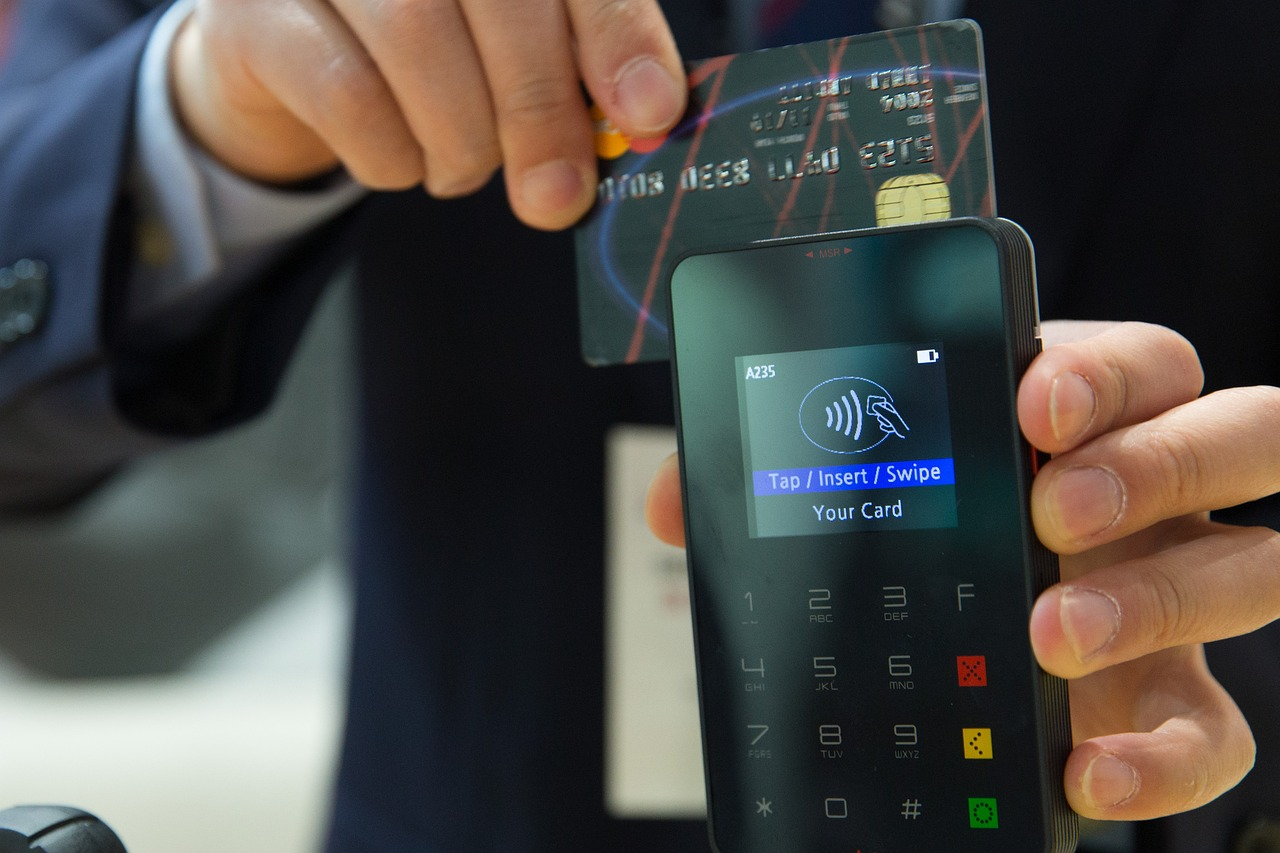

# About 

About this file
This dataset contains insights into credit card transactions made in India, offering a comprehensive look at the spending habits of Indians across the nation

* City: The city in which the transaction took place. (String)
* Date: The date of the transaction. (Date)
* Card Type: The type of credit card used for the transaction. (String)
* Exp Type: The type of expense associated with the transaction. (String)
* Gender: The gender of the cardholder. (String)
* Amount: The amount of the transaction. (Number)

## Importing necessary libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
pd.options.display.max_columns=50

## Importing Data Set


In [3]:
df=pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv")
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


## Workflow
* Understanding the data
* Data cleaning
* Exploratory Data Analysis
* Insights 

# <h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Understanding the data </h1>


In [4]:
df.shape ## There are 7 columns and 26052 rows


(26052, 7)

In [5]:
df.columns ## column names

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [6]:
## Checking data types
df.dtypes

index         int64
City         object
Date         object
Card Type    object
Exp Type     object
Gender       object
Amount        int64
dtype: object

#### Error - Date is in object 

In [7]:
# Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
# checking null values
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

#### There is no null values


In [9]:
# Checking duplicates
df.duplicated().sum()

0

In [10]:
## Basic statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26052.0,13025.500000,7520.708943,0.0,6512.75,13025.5,19538.25,26051.0
Amount,26052.0,156411.537425,103063.254287,1005.0,77120.25,153106.5,228050.00,998077.0


In [11]:
## Basic statistical info of object columns
df.describe(include="object").T

,count,unique,top,freq
City,26052,986,"Bengaluru, India",3552
Date,26052,600,20-Sep-14,65
Card Type,26052,4,Silver,6840
Exp Type,26052,6,Food,5463
Gender,26052,2,F,13680


# <h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Data Cleaning</h1>


In [12]:
## Changing Dtype of date and Extracting Month name, day name, weekday from Date 

from datetime import datetime as dt
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month_name()
df["Day"]=df["Date"].dt.day_name()
df["weekday"]=df["Date"].dt.weekday
df.sample(2)

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
5700,5700,"Greater Mumbai, India",2015-01-17,Signature,Fuel,F,152348,January,Saturday,5
10363,10363,"Greater Mumbai, India",2014-09-28,Signature,Bills,F,237791,September,Sunday,6


In [13]:
## Lets split country and city 
df["City"]=df["City"].str.split(",",expand=True)[0]

In [14]:
## Lets drop index as it is not required
df.drop(columns=["index"],inplace=True)
df.sample(2)

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
13996,Markapur,2014-04-22,Gold,Food,M,187847,April,Tuesday,1
9511,Ahmedabad,2014-05-24,Platinum,Fuel,F,86853,May,Saturday,5


In [15]:
# Checking unique values
for i in df.columns:
    print(i,"-------",df[i].unique())

City ------- ['Delhi' 'Greater Mumbai' 'Bengaluru' 'Ahmedabad' 'Markapur' 'Mavoor'
 'Sillod' 'Nainital' 'Laharpur' 'Shenkottai' 'Neyveli (TS)' 'Kapadvanj'
 'Arambagh' 'Thana Bhawan' 'Kancheepuram' 'Sojat' 'Karjat' 'Mohali'
 'Narayanpet' 'Bhavnagar' 'Viluppuram' 'Jamalpur' 'Udaipurwati' 'Palanpur'
 'Muzaffarpur' 'Taranagar' 'Ambikapur' 'Mundi' 'Padrauna' 'Vijayapura'
 'Vrindavan' 'Byasanagar' 'Mudhol' 'Sohna' 'Pune' 'Lakheri' 'Jehanabad'
 'Shegaon' 'Shikarpur Bulandshahr' 'Dalli-Rajhara' 'Mapusa'
 'Uthamapalayam' 'Nasirabad' 'Kapurthala' 'Anand' 'Arwal' 'Nanded-Waghala'
 'Nilambur' 'Anjar' 'Hubli-Dharwad' 'Jind' 'Koratla' 'Chalakudy' 'Lahar'
 'Ramanathapuram' 'Brahmapur' 'Rahuri' 'Hindupur' 'Ponnani' 'Rajpipla'
 'Pattukkottai' 'Tenali' 'Aizawl' 'Raayachuru' 'Tura' 'Srivilliputhur'
 'Siana' 'Nepanagar' 'Nagaon' 'Oddanchatram' 'Zira' 'Dhuri'
 'Kalyan-Dombivali' 'Mahuva' 'Punch' 'Rajampet' 'Mandvi' 'Nahan' 'Shahdol'
 'Kochi' 'Neemuch' 'Shahabad' 'Mancherial' 'Sirhind Fatehgarh Sahib'
 'Sur

<AxesSubplot:>

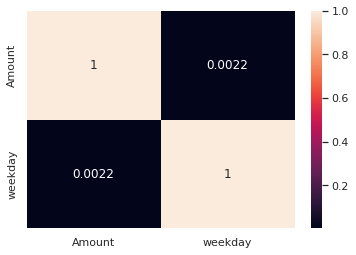

In [16]:
## Lets check correlation
sns.heatmap(df.corr(),annot=True)

#### There is no strong correlation

# <h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Exploratory Data Analysis</h1>

## Univariate Analysis

In [17]:
df.sample(2)

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
19572,Shegaon,2014-10-31,Silver,Grocery,F,274618,October,Friday,4
4535,Greater Mumbai,2014-09-21,Silver,Bills,M,245265,September,Sunday,6


Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64


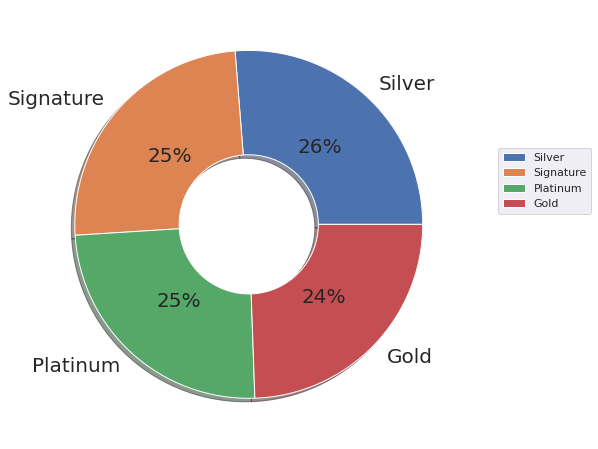

In [115]:
# which card type was mostly used
l=["Silver","Signature","Platinum","Gold"]
x=df["Card Type"].value_counts()
print(x)
plt.figure(figsize=(8,8))
plt.pie(x,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 20},wedgeprops={"width":0.6})
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.6));

#### Silver card is used more 

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64


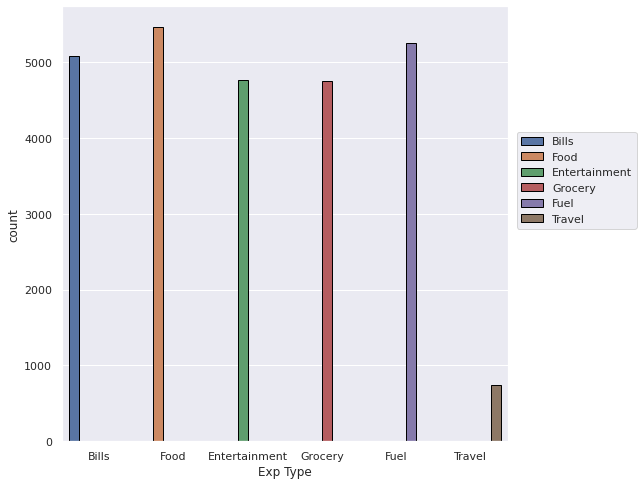

In [19]:
## In which exp types were mostly paid by card 
print(df["Exp Type"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Exp Type",hue="Exp Type",data=df,edgecolor="black")
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.6));

F    13680
M    12372
Name: Gender, dtype: int64


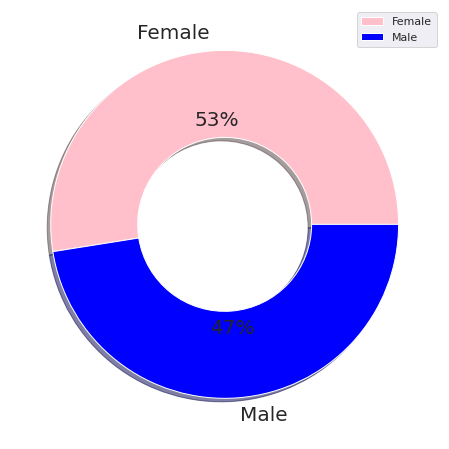

In [20]:
## Which gender has more counts
gen=["Female","Male"]
gender = df["Gender"].value_counts()
print(gender)
plt.figure(figsize=(8,8))
plt.pie(gender,labels=gen,shadow=True,autopct="%0.0f%%",textprops={"fontsize":20},colors=["pink","blue"],wedgeprops={'width': 0.5})
plt.legend();

January      2722
December     2702
October      2665
March        2622
November     2622
April        2587
May          2436
February     2433
August       1393
September    1321
July         1310
June         1239
Name: Month, dtype: int64


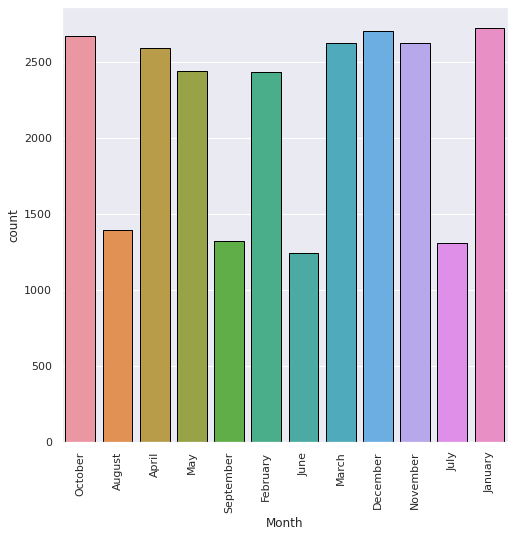

In [21]:
## Peak month for card usage
print(df["Month"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Month",data=df,edgecolor="black")
plt.xticks(rotation=90);

#### In January and December there is high usage of cards payments

Sunday       3812
Saturday     3736
Friday       3719
Thursday     3718
Monday       3715
Tuesday      3697
Wednesday    3655
Name: Day, dtype: int64


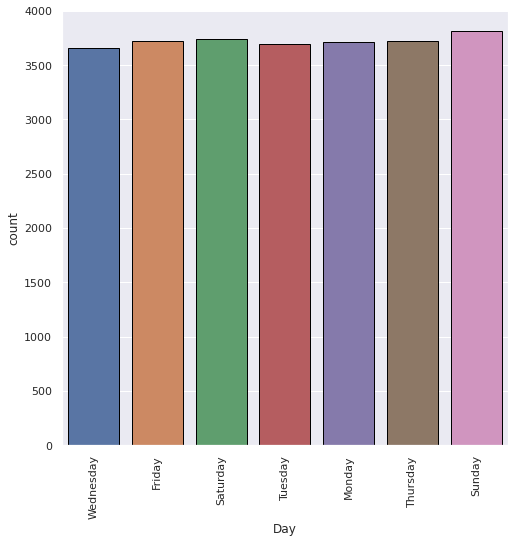

In [22]:
## in which day most cards are used
print(df["Day"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Day",data=df,edgecolor="black")
plt.xticks(rotation=90);

#### On Sundays there is slightly high usage of cards

In [91]:
### Top 10 cities where cards usage is high
df["City"].value_counts().head(10).to_frame()


,City
Bengaluru,3552
Greater Mumbai,3493
Ahmedabad,3491
Delhi,3482
Hyderabad,784
Chennai,774
Kolkata,773
Kanpur,764
Lucknow,759
Jaipur,752


In [24]:
## What is the min, max and average amount spend by cardholders
df["Amount"].agg(["sum","min","max","mean"]).reset_index()

,index,Amount
0,sum,4.074833e+09
1,min,1.005000e+03
2,max,9.980770e+05
3,mean,1.564115e+05


## Bivariate and Multivariate Analysis

In [25]:
df.sample(1)

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
21462,Hyderabad,2015-01-04,Gold,Grocery,M,74600,January,Sunday,6


In [26]:
### Which card type were mostly used by the Males and Females
df.groupby("Gender")["Card Type"].value_counts().to_frame()


Card Type
Gender Card Type           
F      Silver          3773
       Signature       3368
       Gold            3287
       Platinum        3252
M      Platinum        3146
       Gold            3080
       Signature       3079
       Silver          3067

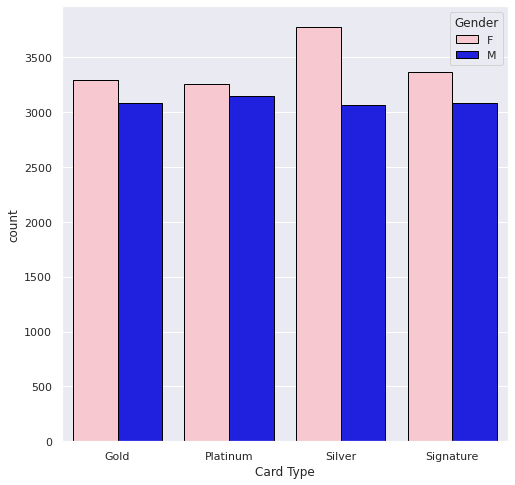

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x="Card Type",hue="Gender",data=df,palette=["pink","blue"],edgecolor="black");


#### Females used the Silver card type were as male have used the platinum card types more

Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64


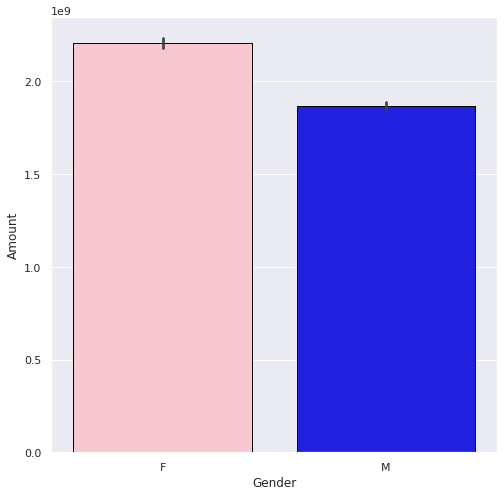

In [28]:
## What is the Total amount spend by the Males and females 
print(df.groupby("Gender")["Amount"].sum())
plt.figure(figsize=(8,8))
sns.barplot(x="Gender",y="Amount",data=df,estimator=sum,palette=["pink","blue"],edgecolor="black");

#### Females spend more amount on credit cards than men 

Gender  Exp Type     
F       Bills            580035469
        Entertainment    358663333
        Food             452817279
        Fuel             392282421
        Grocery          365646998
        Travel            55865530
M       Bills            327037004
        Entertainment    367774203
        Food             371906730
        Fuel             396853400
        Grocery          352560925
        Travel            53390081
Name: Amount, dtype: int64


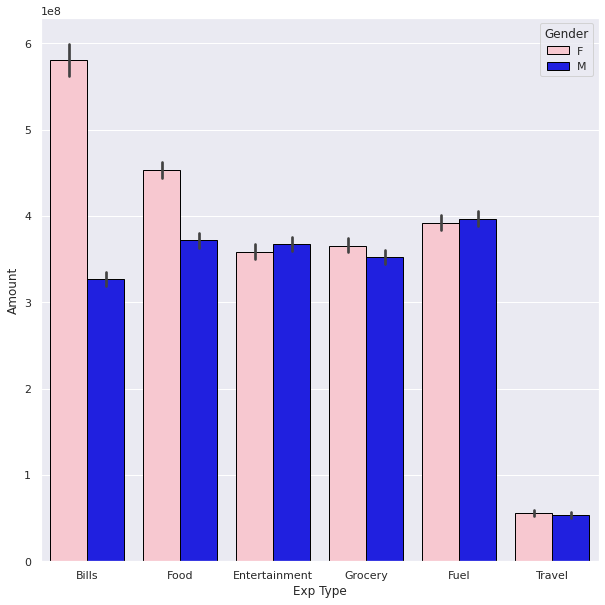

In [29]:
## Which Expenses type were mostly made by the genders
print(df.groupby(["Gender","Exp Type"])["Amount"].sum())
plt.figure(figsize=(10,10))
sns.barplot(x="Exp Type",y="Amount",hue="Gender",data=df,estimator=sum,edgecolor="black",palette=["pink","blue"]);

Gender  Month    
F       October      230188235
        January      227700168
        March        225659403
        April        225640906
        December     220813597
        November     217110069
        May          211850293
        February     210401905
M       January      203509388
        December     196121818
        April        190753828
        October      189657772
        November     186997899
        March        184395043
        February     173110719
        May          163605316
F       August       114659155
        September    114636731
        July         106087028
M       August       103793971
F       June         100563540
M       September     94924702
        July          91894388
        June          90757499
Name: Amount, dtype: int64


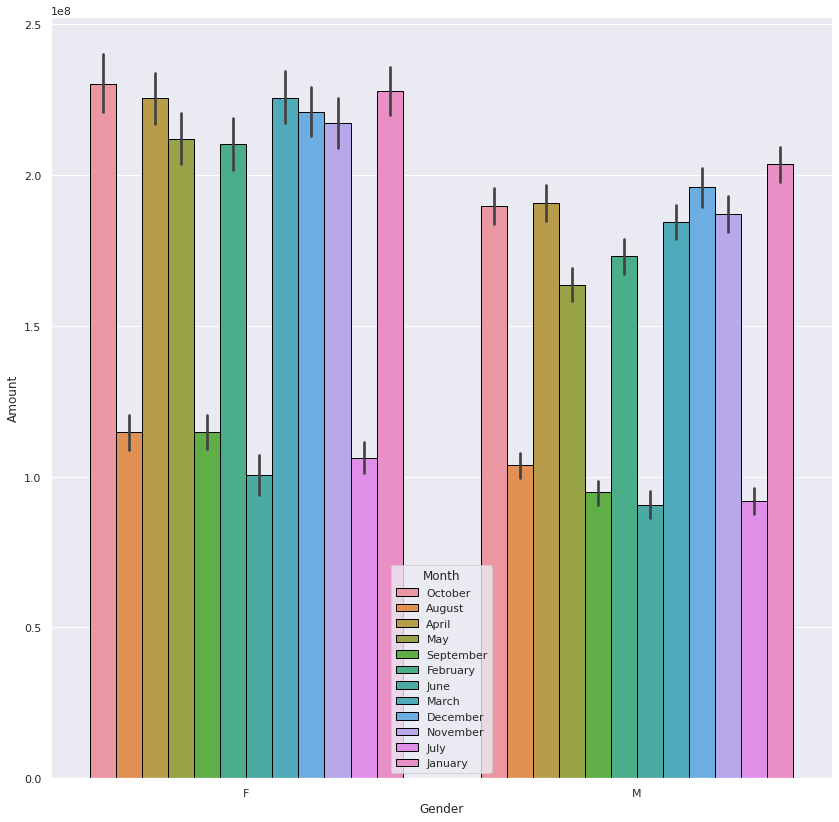

In [30]:
### In which month Males and females spend the higest amount
print(df.groupby(["Gender","Month"])["Amount"].sum().sort_values(ascending=False))
plt.figure(figsize=(14,14))
sns.barplot(x="Gender",y="Amount",hue="Month",data=df,estimator=sum,edgecolor="black");

#### Females buy more in October and Males in january

Gender  Day      
F       Sunday       321720502
        Tuesday      321581211
        Friday       319484869
        Saturday     316807962
        Thursday     311548731
        Wednesday    307486202
        Monday       306681553
M       Sunday       274624865
        Saturday     271305008
        Monday       266944922
        Tuesday      266708361
        Wednesday    263744962
        Friday       263343938
        Thursday     262850287
Name: Amount, dtype: int64


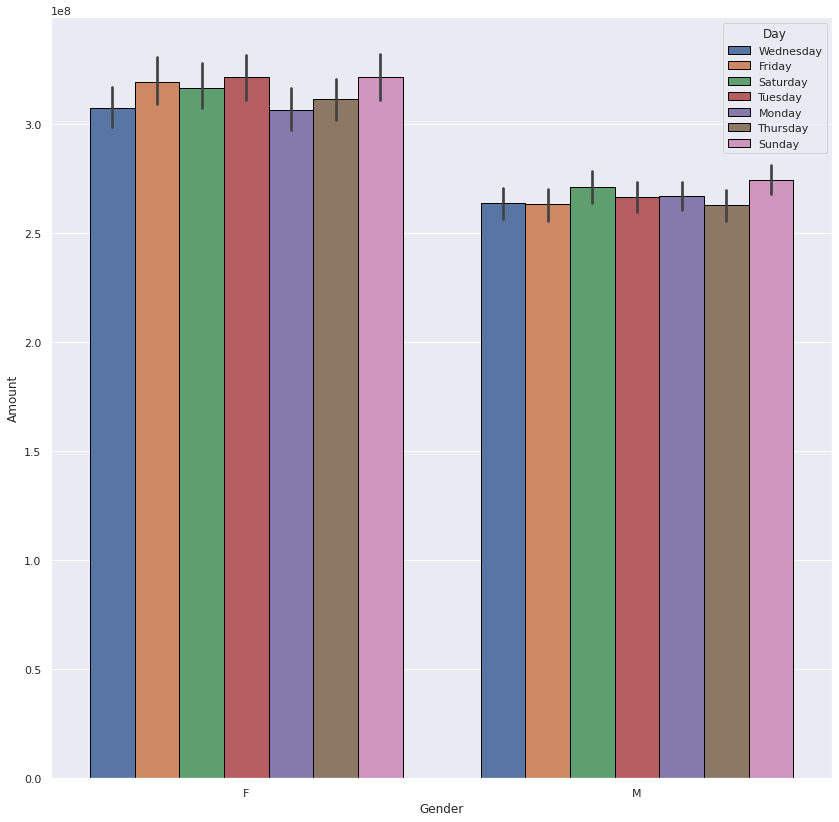

In [31]:
### In which Day Males and females spend the higest amount
print(df.groupby(["Gender","Day"])["Amount"].sum().sort_values(ascending=False))
plt.figure(figsize=(14,14))
sns.barplot(x="Gender",y="Amount",hue="Day",data=df,estimator=sum,edgecolor="black");

#### On Sundays both Male and Female spend more

Month      Exp Type
January    Fuel        43721871
April      Food        42498415
December   Grocery     41500753
           Fuel        41409354
January    Food        41155427
                         ...   
October    Travel       4223551
June       Travel       3446583
July       Travel       2877270
August     Travel       2114806
September  Travel       1629169
Name: Amount, Length: 72, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='Amount'>

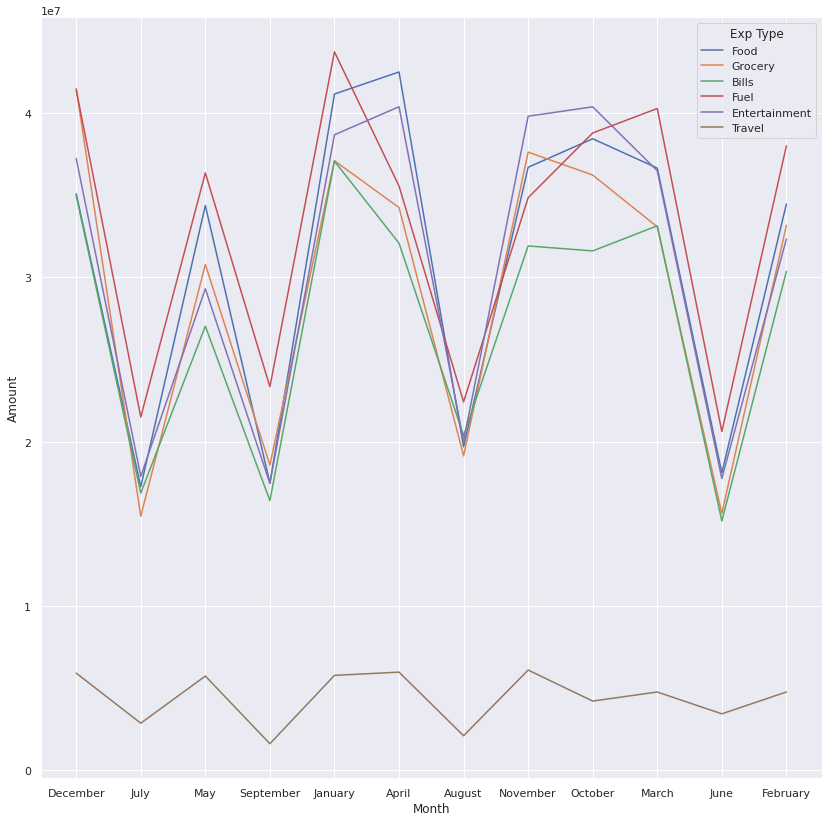

In [108]:
# What was the montly expense type of both males and females
print(male.groupby(["Month","Exp Type"])["Amount"].sum().sort_values(ascending=False))
plt.figure(figsize=(14,14))
sns.lineplot(x='Month',y='Amount',data=male, hue='Exp Type',ci=None,estimator=sum)

Month      Exp Type
October    Bills       65421671
April      Bills       63412363
March      Bills       60399416
February   Bills       57916761
January    Bills       56425536
                         ...   
           Travel       3304882
June       Travel       2788851
August     Travel       1697025
September  Travel       1643490
July       Travel       1606542
Name: Amount, Length: 72, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='Amount'>

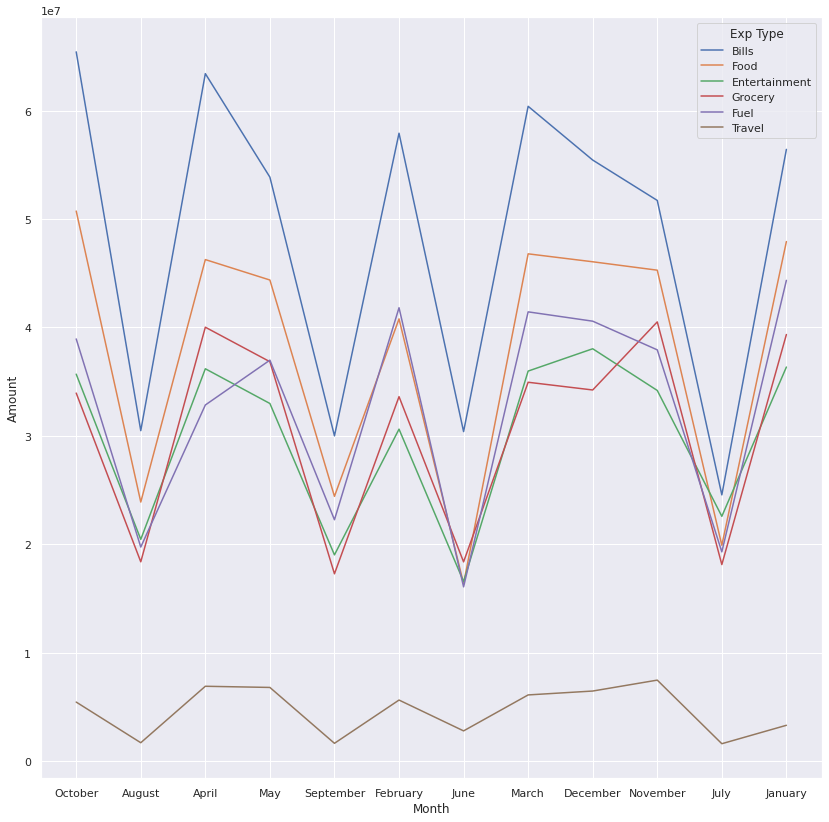

In [109]:
# What was the montly expense type of both males and females
print(female.groupby(["Month","Exp Type"])["Amount"].sum().sort_values(ascending=False))
plt.figure(figsize=(14,14))
sns.lineplot(x='Month',y='Amount',data=female, hue='Exp Type',ci=None,estimator=sum)

Month      Exp Type
October    Bills       97032148
April      Bills       95492040
March      Bills       93537432
January    Bills       93497483
December   Bills       90413962
                         ...   
January    Travel       9091085
June       Travel       6235434
July       Travel       4483812
August     Travel       3811831
September  Travel       3272659
Name: Amount, Length: 72, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='Amount'>

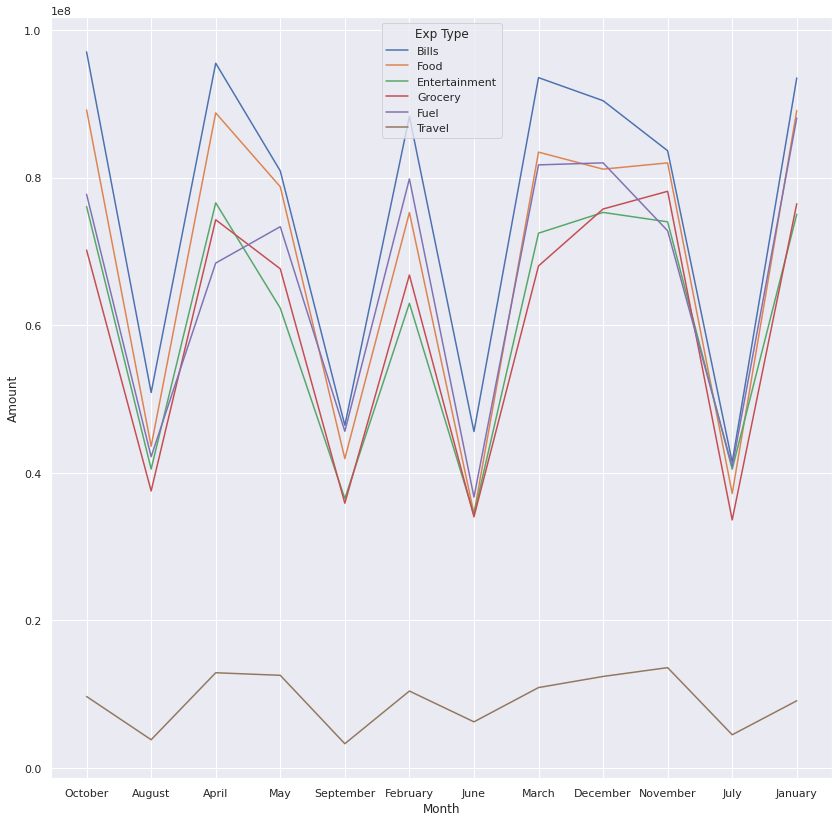

In [107]:
# In which month Amount was more corresponding to exp types
print(df.groupby(["Month","Exp Type"])["Amount"].sum().sort_values(ascending=False))
plt.figure(figsize=(14,14))
sns.lineplot(x='Month',y='Amount',data=df, hue='Exp Type',ci=None,estimator=sum)

In [33]:
df.sample()

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
16323,Kaithal,2013-10-11,Platinum,Entertainment,F,229300,October,Friday,4


In [34]:
## what is the weekday and weekend total Amount
week_df=df[df["weekday"]<5]
weekend_df=df[df["weekday"]>=5]
print("weekdays Spend : ",week_df["Amount"].sum())
print("weekends Spend : ",weekend_df["Amount"].sum())

weekdays Spend :  2890375036
weekends Spend :  1184458337


Food             3832
Fuel             3723
Bills            3630
Entertainment    3399
Grocery          3386
Travel            534
Name: Exp Type, dtype: int64


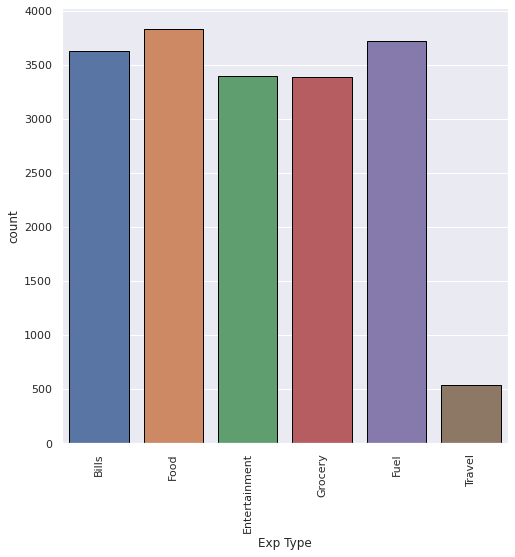

In [35]:
## On Weekdays and weekends mostly which exp type is frequent
print(week_df["Exp Type"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Exp Type",data=week_df,edgecolor="black")
plt.xticks(rotation=90);

Food             1631
Fuel             1534
Bills            1448
Grocery          1368
Entertainment    1363
Travel            204
Name: Exp Type, dtype: int64


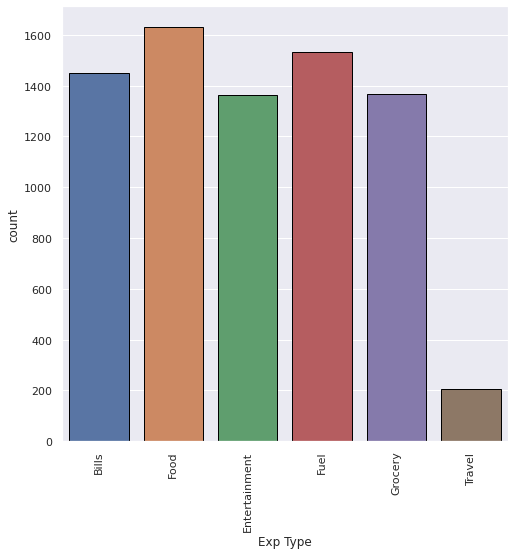

In [36]:
print(weekend_df["Exp Type"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Exp Type",data=weekend_df,edgecolor="black")
plt.xticks(rotation=90);


Gender  Exp Type     
F       Bills            407324035
        Entertainment    257415128
        Food             318221534
        Fuel             284099001
        Grocery          259296894
        Travel            40425974
M       Bills            233884313
        Entertainment    264831694
        Food             260732012
        Fuel             277585351
        Grocery          249544960
        Travel            37014140
Name: Amount, dtype: int64


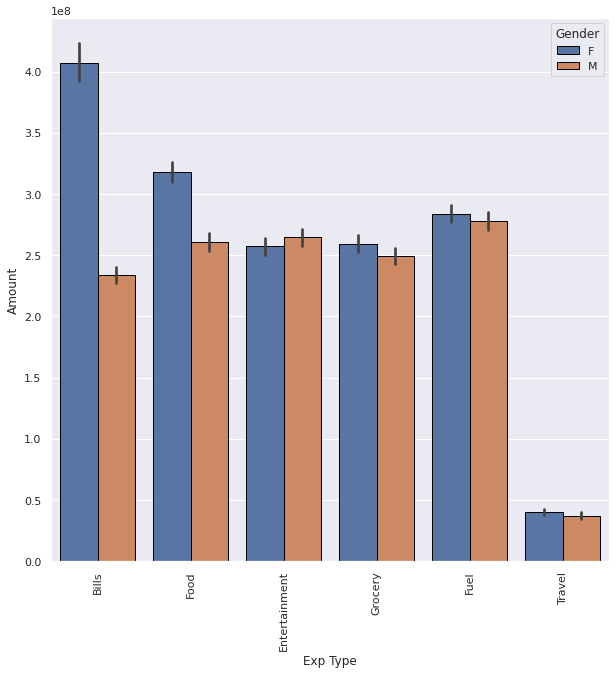

In [122]:
print(week_df.groupby(["Gender","Exp Type"])["Amount"].sum())
plt.figure(figsize=(10,10))
sns.barplot(x="Exp Type",y="Amount",hue="Gender",data=week_df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);

Gender  Exp Type     
F       Bills            172711434
        Entertainment    101248205
        Food             134595745
        Fuel             108183420
        Grocery          106350104
        Travel            15439556
M       Bills             93152691
        Entertainment    102942509
        Food             111174718
        Fuel             119268049
        Grocery          103015965
        Travel            16375941
Name: Amount, dtype: int64


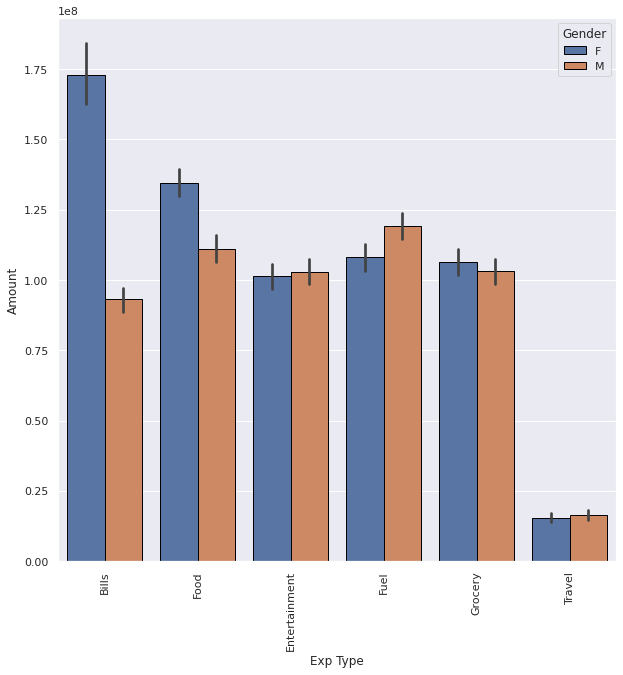

In [123]:
print(weekend_df.groupby(["Gender","Exp Type"])["Amount"].sum())
plt.figure(figsize=(10,10))
sns.barplot(x="Exp Type",y="Amount",hue="Gender",data=weekend_df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);

             City     Amount
0  Greater Mumbai  576751476
1       Bengaluru  572326739
2       Ahmedabad  567794310
3           Delhi  556929212
4         Kolkata  115466943
5         Lucknow  115334476
6         Chennai  114730600
7       Hyderabad  114493477
8           Surat  114486151
9          Kanpur  114370532


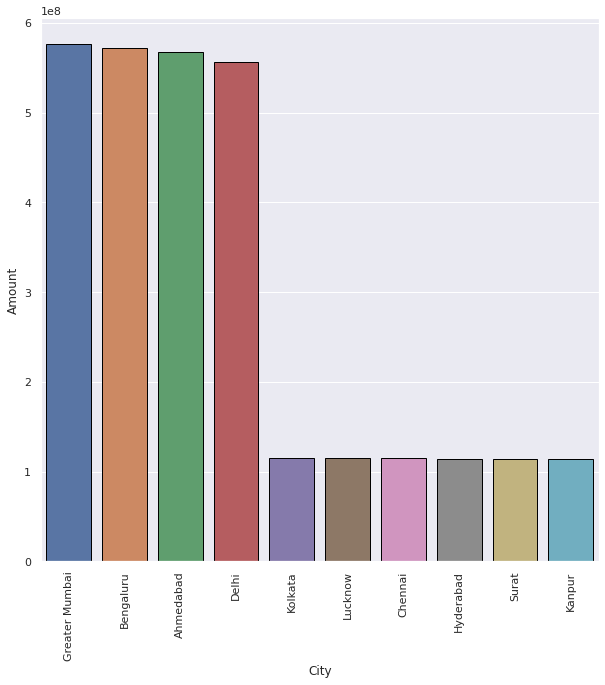

In [37]:
##  In which top 10 city highest amount was spend 
x = df.groupby("City")["Amount"].sum().sort_values(ascending=False).reset_index().head(10)
print(x)
plt.figure(figsize=(10,10))
sns.barplot(x="City",y="Amount",data=x,edgecolor="black")
plt.xticks(rotation=90);

In [38]:
df.sample(2)

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
19773,Sehore,2015-04-04,Gold,Bills,M,249938,April,Saturday,5
10231,Greater Mumbai,2014-01-03,Gold,Fuel,F,188442,January,Friday,4


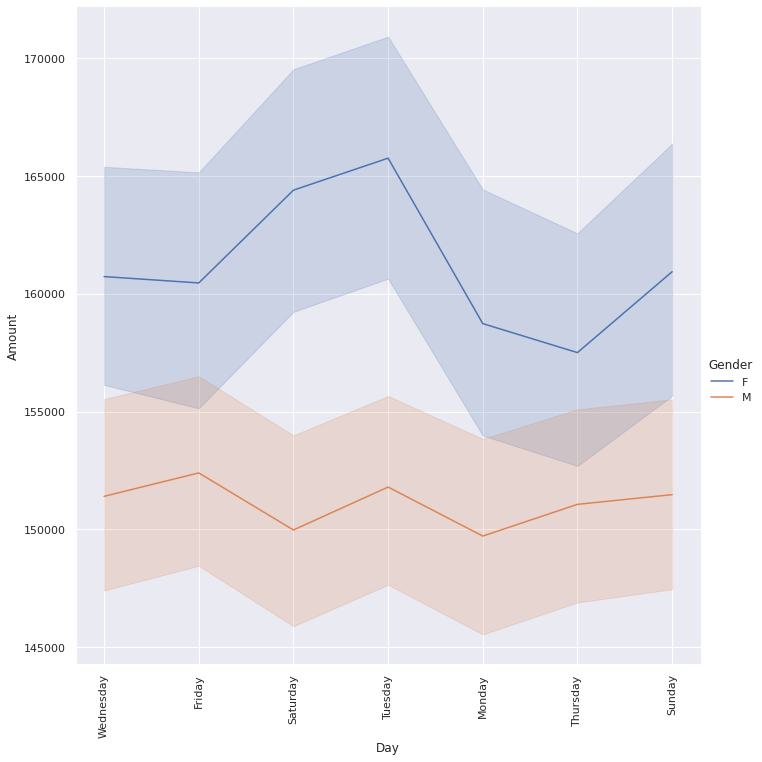

In [39]:
#ewhat is the reation between male and female amount distribution corresponding to day
sns.relplot(x="Day",y="Amount",data=df,kind="line",hue="Gender",height=10)
plt.xticks(rotation=90);

Card Type
Silver       602433469
Signature    548005149
Platinum     531940229
Gold         522932183
Name: Amount, dtype: int64


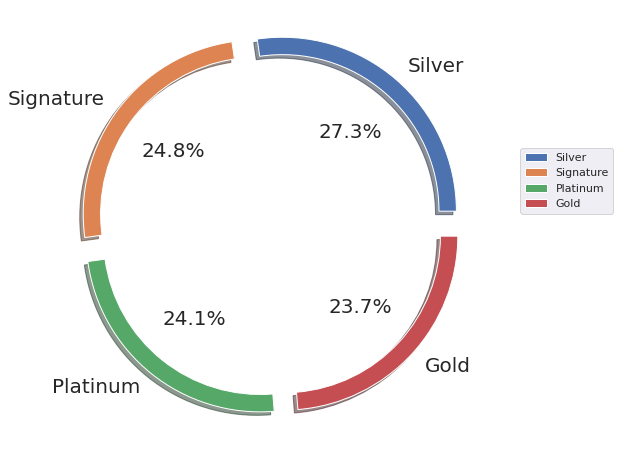

In [112]:
## Which card type has generated the most amount by females 
female=df[df["Gender"]=="F"]
x=female.groupby("Card Type")["Amount"].sum().sort_values(ascending=False)
l=["Silver","Signature","Platinum","Gold"]
print(x)
plt.figure(figsize=(8,8))
plt.pie(x,labels=l,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={"width":0.10},explode=[0.1,0.1,0.1,0.1])
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.6));

Card Type
Platinum     475698790
Silver       467180244
Signature    465035956
Gold         461607353
Name: Amount, dtype: int64


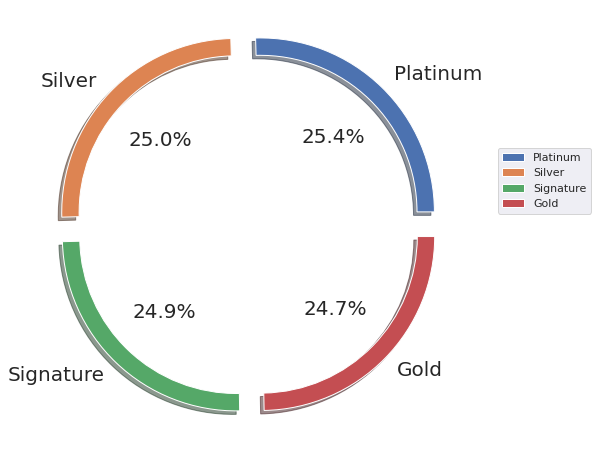

In [127]:
## Which card type has generated the most amount by males 
male=df[df["Gender"]=="M"]
m=male.groupby("Card Type")["Amount"].sum().sort_values(ascending=False)
l=["Platinum","Silver","Signature","Gold"]
print(m)
plt.figure(figsize=(8,8))
plt.pie(m,labels=l,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={"width":0.10},explode=[0.1,0.1,0.1,0.1])
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.6));

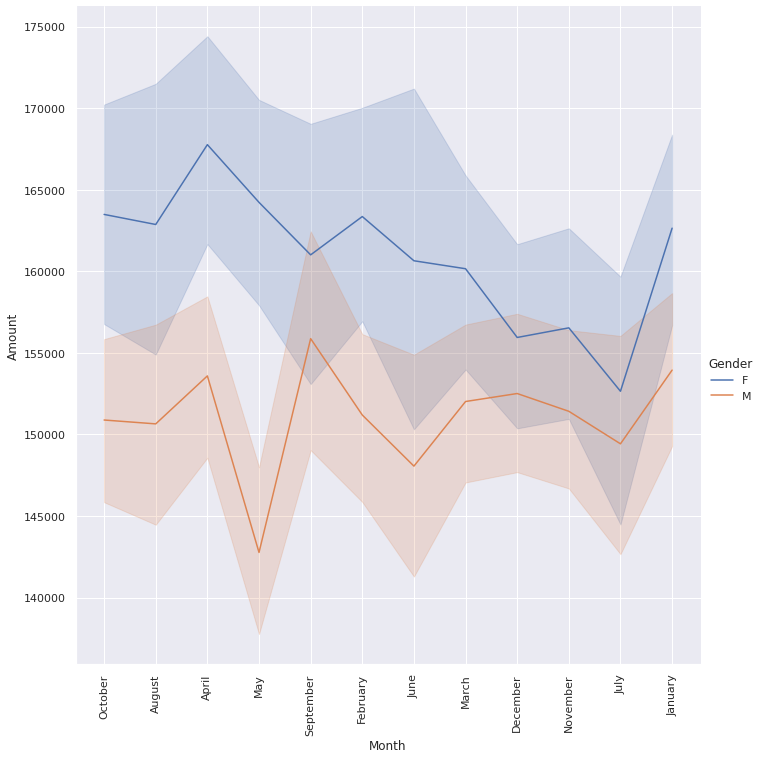

In [42]:
## What is the monthly distribution of amount by Males and Females
sns.relplot(x="Month",y="Amount",data=df,kind="line",hue="Gender",height=10)
plt.xticks(rotation=90);

City
Greater Mumbai    337617046
Bengaluru         331198446
Delhi             323692299
Ahmedabad         319172275
Kanpur             59832225
Name: Amount, dtype: int64


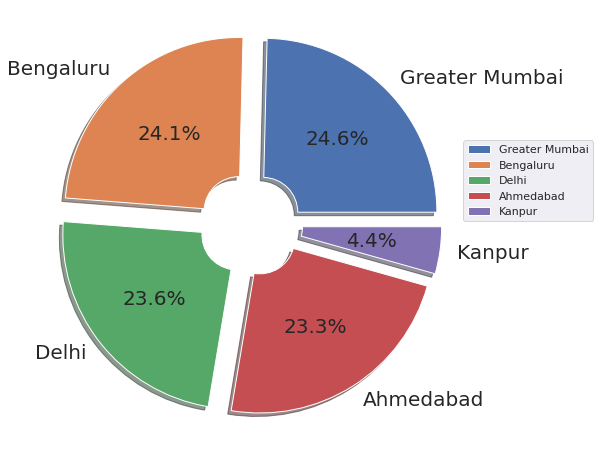

In [43]:
## In which Top 5 City Males and females made most amount on credit card
fe = female.groupby("City")["Amount"].sum().sort_values(ascending=False).head(5)
print(fe)
plt.figure(figsize=(8,8))
plt.pie(fe,labels=female.groupby("City")["Amount"].sum().sort_values(ascending=False).head(5).index,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={'width': 0.8},explode=[0.1,0.1,0.1,0.1,0.1])
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.6));


City
Ahmedabad         248622035
Bengaluru         241128293
Greater Mumbai    239134430
Delhi             233236913
Kolkata            62257704
Name: Amount, dtype: int64


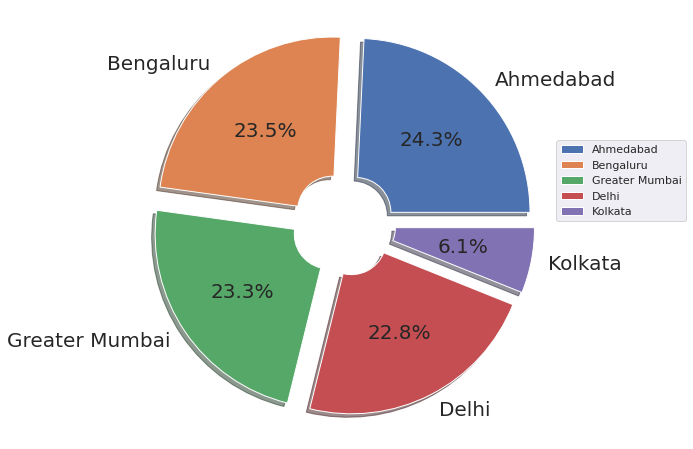

In [54]:
ma = male.groupby("City")["Amount"].sum().sort_values(ascending=False).head(5)
print(ma)
plt.figure(figsize=(8,8))
plt.pie(ma,labels=male.groupby("City")["Amount"].sum().sort_values(ascending=False).head(5).index,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={'width': 0.8},explode=[0.1,0.1,0.1,0.1,0.1])
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.6));

Exp Type
Bills            907072473
Food             824724009
Fuel             789135821
Entertainment    726437536
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64


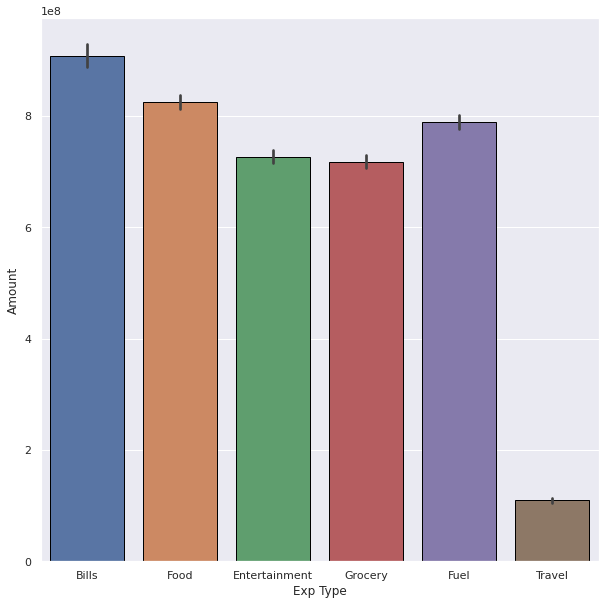

In [74]:
# Which Exp Type creates the huge amount
print(df.groupby("Exp Type")["Amount"].sum().sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.barplot(x="Exp Type",y="Amount",edgecolor="black",data=df,estimator=sum,);



In [46]:
## Which is the min, max Amount with full details
df[df["Amount"]==df["Amount"].max()]

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
80,Greater Mumbai,2014-10-14,Platinum,Bills,F,998077,October,Tuesday,1


In [47]:
df[df["Amount"]==df["Amount"].min()]

,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day,weekday
13444,Delhi,2014-05-02,Platinum,Grocery,F,1005,May,Friday,4


In [135]:
from wordcloud import WordCloud as word
d=df["City"].value_counts()
wc = word(background_color='white', width=1000, height=600)
wc.generate_from_frequencies(d)



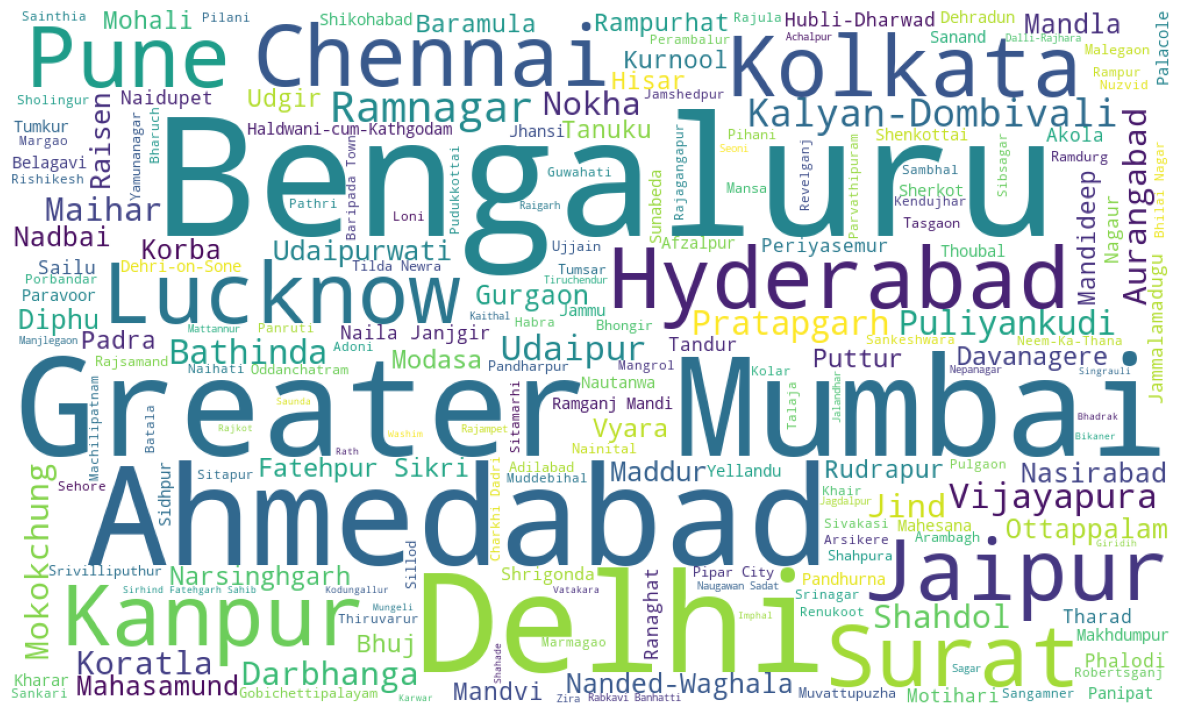

In [136]:
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### In this highlighted cities the Credit spends were the most 

In [89]:
df.to_csv("Credit Card Spending Habits (EDA).csv")

> # <h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Insights</h1>



* Added column Month, Day and Weekday, Split the column City with country to only City through feature engineering.
* Silver card types were most in the payments . 
* In Fuel and Food expenses were most counts paid by the cards.
* In January and December there is high usage of cards payments and On sundays there were more usage of card payments.
* Bengaluru Greater Mumbai, Ahmedabad, Delhi These are the Top 4 Cities were card usage were more.
* Females used the Silver card type were as male have used the platinum card types more.
* Females were more depend on credit cards as they spend more amount on credit cards than men. 
* Females and Males mostly spend amount on Bills and Food using credit card.
* Females mostly spend in October and Males in january using credit cards.
* Males has paid highest in january in Fuel expense where as females paid highest in october in Bills.
* Weekday Amount spends were more than weekends and that were mostly on Food and entertainment by each gender.
* Males spend the highest amount with Platinum card type and Females spend the highest amount with Silver card type.
* In Greater Mumbai females spends were highest were as males spends were highest in Ahmedabad.
* In bills payment the amount gather is the highest.

